<a href="https://colab.research.google.com/github/barakharari/PropagandaDetection/blob/main/ML_models_11_5_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
import io

In [22]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Lasso

from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
## load dataset 
from google.colab import files
uploaded = files.upload()

Saving classifier_training_data.csv to classifier_training_data.csv


In [4]:
df = pd.read_csv(io.StringIO(uploaded["classifier_training_data.csv"].decode('utf-8')))
#df = pd.read_csv('sample_data/classifier_training_data.csv')
#df = open('classifier_training_data.csv', "r")
df.head(5)

,Unnamed: 0,File Name,Candidate,Sentence,Propaganda Segments,Loaded_Language,"Name_Calling,Labeling",Repetition,"Exaggeration,Minimisation",Doubt,Appeal_to_fear-prejudice,Flag-Waving,Causal_Oversimplification,Slogans,Appeal_to_Authority,Black-and-White_Fallacy,Thought-terminating Cliches,"Whataboutism,Straw_Men,Red_Herring","Obfuscation,Intentional_Vagueness,Confusion","Bandwagon,Reductio_ad_hitlerum",Num Prop,Thought-terminating_Cliches
0,0,DT_press_release_114.txt,DT,Trump received the endorsement of two true Ame...,"true American heroes: Repetition, ""fought agai...",NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,1,DT_press_release_114.txt,DT,"Mark ""OZ"" Geist and John ""TIG"" Tiegen are two ...",Americans: Repetition,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,2,DT_press_release_114.txt,DT,"Trump stated ""I am truly honored to have the s...",American heroes the best of their generation T...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,3,DT_press_release_114.txt,DT,The American people can know with certainty I ...,"American people: Flag-Waving, """"always place t...",NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4,4,DT_press_release_114.txt,DT,I am the most militaristic person and it is so...,"militaristic person: Name_Calling,Labeling",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [5]:
df = df.fillna(0)## is there anywhere that shouldn't be 0 instead of NaN?
df.head(5)

,Unnamed: 0,File Name,Candidate,Sentence,Propaganda Segments,Loaded_Language,"Name_Calling,Labeling",Repetition,"Exaggeration,Minimisation",Doubt,Appeal_to_fear-prejudice,Flag-Waving,Causal_Oversimplification,Slogans,Appeal_to_Authority,Black-and-White_Fallacy,Thought-terminating Cliches,"Whataboutism,Straw_Men,Red_Herring","Obfuscation,Intentional_Vagueness,Confusion","Bandwagon,Reductio_ad_hitlerum",Num Prop,Thought-terminating_Cliches
0,0,DT_press_release_114.txt,DT,Trump received the endorsement of two true Ame...,"true American heroes: Repetition, ""fought agai...",0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1,DT_press_release_114.txt,DT,"Mark ""OZ"" Geist and John ""TIG"" Tiegen are two ...",Americans: Repetition,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,DT_press_release_114.txt,DT,"Trump stated ""I am truly honored to have the s...",American heroes the best of their generation T...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,DT_press_release_114.txt,DT,The American people can know with certainty I ...,"American people: Flag-Waving, """"always place t...",0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,4,DT_press_release_114.txt,DT,I am the most militaristic person and it is so...,"militaristic person: Name_Calling,Labeling",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
#df.assign(
   # is_senior = lambda dataframe: dataframe['age'].map(lambda age: True if age >= 65 else False)

df =df.assign(
    BCandidate = lambda dataframe : dataframe['Candidate'].map(lambda Candidate: 1 if Candidate == "DT" else 0)
)
df

,Unnamed: 0,File Name,Candidate,Sentence,Propaganda Segments,Loaded_Language,"Name_Calling,Labeling",Repetition,"Exaggeration,Minimisation",Doubt,Appeal_to_fear-prejudice,Flag-Waving,Causal_Oversimplification,Slogans,Appeal_to_Authority,Black-and-White_Fallacy,Thought-terminating Cliches,"Whataboutism,Straw_Men,Red_Herring","Obfuscation,Intentional_Vagueness,Confusion","Bandwagon,Reductio_ad_hitlerum",Num Prop,Thought-terminating_Cliches,BCandidate
0,0,DT_press_release_114.txt,DT,Trump received the endorsement of two true Ame...,"true American heroes: Repetition, ""fought agai...",0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1
1,1,DT_press_release_114.txt,DT,"Mark ""OZ"" Geist and John ""TIG"" Tiegen are two ...",Americans: Repetition,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,2,DT_press_release_114.txt,DT,"Trump stated ""I am truly honored to have the s...",American heroes the best of their generation T...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,3,DT_press_release_114.txt,DT,The American people can know with certainty I ...,"American people: Flag-Waving, """"always place t...",0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
4,4,DT_press_release_114.txt,DT,I am the most militaristic person and it is so...,"militaristic person: Name_Calling,Labeling",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,4911,DT_tweets_1_4.txt,DT,is a sad case. A total embarrassment to both h...,total embarrassment to both himself and his fa...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4912,4912,DT_tweets_309_3.txt,DT,ISIS threatens us today because of the decisio...,ISIS threatens us today: Appeal_to_fear-prejudice,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4913,4913,DT_tweets_437_9.txt,DT,2016-09-08 16:25:36 Hillary Clinton answered e...,She is totally confused. Unfit to serve as #PO...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4914,4914,DT_tweets_461_3.txt,DT,2016-09-21 13:20:15 The situations in Tulsa an...,"tragic: Loaded_Language, ""We must come togethe...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1


In [7]:
dfH = df.loc[df['Candidate']=='HC',:]
print(len(dfH))

dfT =df.loc[df['Candidate']=='DT',:]
#print(len(dfT))
#print(.5*(len(dfT)/len(dfH)))



df_new = df.append(dfH)
#df_new = df_new.append(dfH)
df_new = df_new.append(dfH[:math.floor(len(dfH)*.63)])
print(len(df_new)/len(dfT))

df = df_new

1352
1.9974747474747474


In [8]:

#array = df_0.values

#X = array[:,5:14 ]## what if I want to select by the names of the column not the index? 
#Y = array[: , 2]
X = df.loc[:,'Loaded_Language':'Bandwagon,Reductio_ad_hitlerum',]
Y = df.loc[:,"BCandidate"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2)

In [23]:
## repeat rows for HC so that we have even DT and HC doccumnents 

## ML models 

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))#0 
# add lassau or ridgid regression - regularization with penalty terms - play around with the ammount of penalty 
models.append(('SVM', SVC(gamma='auto')))#5 # support vector machine
#try different kernals for SVC
models.append(('ETC', ExtraTreesClassifier(n_estimators=100, random_state=0)))#6 ## dont need make_classifier?
models.append(('RFC', RandomForestClassifier(max_depth= 2, random_state = 0)))# 7 ## branching patterns and depth parameters - random forest is a type of decision tree 
# create a tensor full of results based on different parameters - do a grid search 
# make "model_results" file - dynamic names 
#could paralelize these operations - maybe not worth the time 
models.append(('null0', DummyRegressor(strategy="constant", constant= 0)))# 8
models.append(('null1', DummyRegressor(strategy="constant", constant= 1)))#9

# evaluate each model in turn
results = []
names = []
roc_auc= []
fitted_mods=[]

for i in models: 
	print(i)
	fitted_mods.append(i[1].fit(X_train, Y_train))
 
roc_auc

for i in fitted_mods: 
	roc_auc.append(roc_auc_score(Y_test,i.predict(X_test)))
 
print(roc_auc)

#for name, model in models:
#	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)# what does this do?
#	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')# I think this is like bootstraping
#	roc_auc.append( cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc'))
#	results.append(cv_results)
#	names.append(name)
	
#	mods.append(model.fit(X_train,Y_train))


## one loop to train the model and then save them 
# find the results and save them 

#
	#print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()),)



 #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

('LR', LogisticRegression(multi_class='ovr', solver='liblinear'))
('SVM', SVC(gamma='auto'))
('ETC', ExtraTreesClassifier(random_state=0))
('RFC', RandomForestClassifier(max_depth=2, random_state=0))
('null0', DummyRegressor(constant=0, strategy='constant'))
('null1', DummyRegressor(constant=1, strategy='constant'))
[0.5583017227754069, 0.5601074758969494, 0.5648095463884937, 0.5630116959064327, 0.5, 0.5]


In [11]:
print(fitted_mods)

[SVC(gamma='auto'), ExtraTreesClassifier(random_state=0), RandomForestClassifier(max_depth=2, random_state=0), DummyRegressor(constant=array(0), strategy='constant'), DummyRegressor(constant=array(1), strategy='constant')]


In [ ]:
## printing imporant stats
for i in range(len(names)):
  print(names[i],'accuracy:' , results[i].mean(), 'roc auc:',roc_auc[i].mean())


LR accuracy: 0.5750612030956125 roc auc: 0.5959779492694268
LDA accuracy: 0.5708442018931336 roc auc: 0.5932301783731779
KNN accuracy: 0.5496216816205717 roc auc: 0.5614705042146583
CART accuracy: 0.5748842228594333 roc auc: 0.6037636633471071
NB accuracy: 0.5518878919618908 roc auc: 0.5859531901355055
SVM accuracy: 0.5696201399808838 roc auc: 0.5775929113709095
ETC accuracy: 0.5748842228594333 roc auc: 0.6037636633471071
RFC accuracy: 0.5652264668701632 roc auc: 0.5941269592759146
null0 accuracy: 0.49798045200875657 roc auc: 0.5
null1 accuracy: 0.5020195479912435 roc auc: 0.5


TypeError: ignored

In [ ]:

for i in range(len(names)): 
	print(names[i],roc_auc[i].mean())

LR 0.5959779492694268
LDA 0.5932301783731779
KNN 0.5614705042146583
CART 0.6037636633471071
NB 0.5859531901355055
SVM 0.5775929113709095
ETC 0.6037636633471071
RFC 0.5941269592759146
null0 0.5
null1 0.5


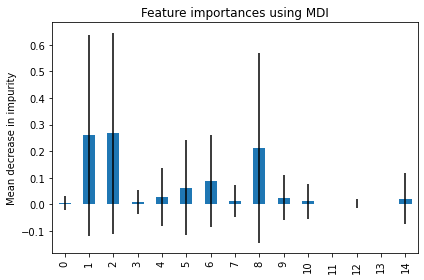

In [ ]:
## importantce on RandomForest

importances= mods[7].feature_importances_
std = np.std([tree.feature_importances_ for tree in mods[7].estimators_], axis=0)


forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()




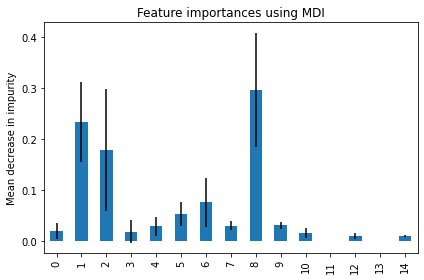

In [ ]:
## importance on extra trees
importances= mods[6].feature_importances_
std = np.std([tree.feature_importances_ for tree in mods[6].estimators_], axis=0)


forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#https://www.youtube.com/watch?v=uVJXPPrWRJ0
#source^

from sklearn.metrics import roc_curve, roc_auc_score

working =mods[0]
working_probs = working.predict_proba(X_test)
print(working_probs)
working_probs = working_probs[:,0]## not sure why we do this 
working_AUC = roc_auc_score(Y_test,working_probs)
print(working_AUC)

probs = []
'''
for i in range(len(mods)):
  M = mods[i]
  M_probs = M.predict_proba(X_test)## this doesn't work for one of the tests.
  M_probs = M_probs[:,1]## not sure why we do this 
  M_AUC = roc_auc_score(Y_test,M_probs)
  print(working_AUC)
  '''

[[0.5545916  0.4454084 ]
 [0.49073569 0.50926431]
 [0.5545916  0.4454084 ]
 ...
 [0.5545916  0.4454084 ]
 [0.4046906  0.5953094 ]
 [0.46902789 0.53097211]]
0.434835616843725


"\nfor i in range(len(mods)):\n  M = mods[i]\n  M_probs = M.predict_proba(X_test)## this doesn't work for one of the tests.\n  M_probs = M_probs[:,1]## not sure why we do this \n  M_AUC = roc_auc_score(Y_test,M_probs)\n  print(working_AUC)\n  "

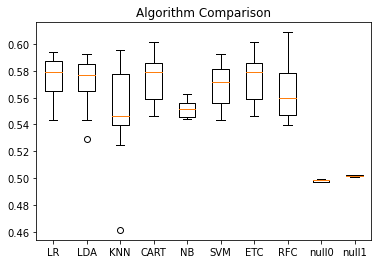

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Make sure we save the results 
- 